In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sys
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\CT")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\3DTomoGAN")
from plots import *
import os
import utils
import h5py
from scipy.optimize import curve_fit
from PIL import Image

import scipy.ndimage as nd

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.patheffects as PathEffects

%matplotlib inline

%reload_ext autoreload
%autoreload 2

In [32]:
root = r"C:\Users\Bruker\Documents"
choose_formatter(False)

In [33]:
val_data = {"gt":"gt00500_y.png", "in": "in00500_y.png", "out": "it00500_y.png"}


for k, v in val_data.items():

    val_data[k] = np.squeeze(Image.open(os.path.join(root, v)))

    #val_data[k] = ( val_data[k] - np.min(val_data[k]) )/ (np.max(val_data[k]) - np.min(val_data[k]))

In [34]:
ssim = {}
psnr = {}

for k, v in val_data.items():

    ssim[k] = utils.calc_ssim(v, val_data["gt"])
    psnr[k] = utils.calc_psnr(v, val_data["gt"])

print(ssim)
print(psnr)
    

{'gt': 1.0, 'in': 0.3846786795818318, 'out': 0.8590258167058149}
{'gt': inf, 'in': 25.99824999335751, 'out': 26.585077720722342}


C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\3DTomoGAN\utils.py:147: RuntimeWarning: divide by zero encountered in double_scalars
  psnr = 10 * np.log10(max_val**2 / mse)


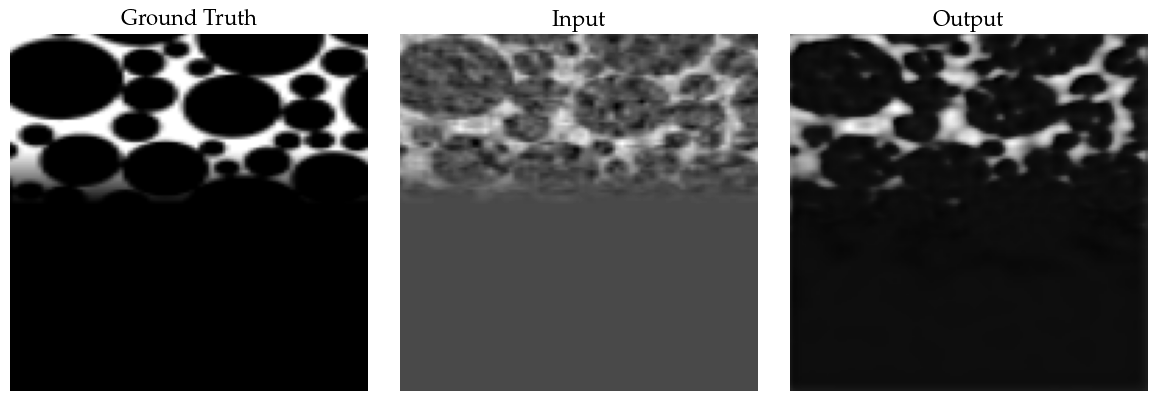

In [43]:
# for k, v in val_data.items():

#     plt.figure()
#     plt.imshow(v, cmap="gray")
#     plt.title(f"{k}: SSIM: {ssim[k]:.4f}, PSNR: {psnr[k]:.4f}")
#     plt.axis("off")
#     plt.colorbar()
#     plt.show()

plot_slice_grid(
    [val_data["gt"], val_data["in"], val_data["out"]],
    ["Ground Truth", "Input", "Output"],
    bar=False,
    folder ="Hourglass",
    savefig=True,
    savefile="validation_test"
)

In [51]:



# Load .npy files

x1, x2 = 672, 928
y1, y2 = 384, 640
z1, z2 = 384, 640

slice = [[x1, x2], [y1, y2], [z1, z2]]

names = [
    "hourglassV3_13_55",
]

crossections = {
    # "favg6":  {"name": names[0] },
    # "favg12": { "name": names[1]},
    # "favg24": {"name": names[2]},
}

identifiers = [
    "gt",
    "Rec_0_1_fdk",
    "Rec_0_3_fdk",
    "Rec_0_5_fdk",
    "Rec_0_8_fdk",
    "Rec_0_1_fdk_enhanced_800512512",
    "Rec_0_3_fdk_enhanced_800512512",
    "Rec_0_5_fdk_enhanced_800512512",
    "Rec_0_8_fdk_enhanced_800512512",

]
keys = [
    "gt",
    "13",
    "39",
    "65",
    "104",
    "13_enhanced",
    "39_enhanced",
    "65_enhanced",
    "104_enhanced",
]

# for k, v in crossections.items():
for j,(id,key) in enumerate(zip(identifiers, keys)):

    if key.endswith("enhanced"):
        x1, x2 = 0,256
        y1, y2 = 0,256
        z1, z2 = 0,256
    else:
        x1, x2 = 672, 928
        y1, y2 = 384, 640
        z1, z2 = 384, 640

    load_name = f"{names[0]}_{identifiers[j]}_{x1}_{x2}_{y1}_{y2}_{z1}_{z2}.npy"
    load_path = os.path.join(root, load_name)
    crossections[key]= np.squeeze(np.load(load_path))


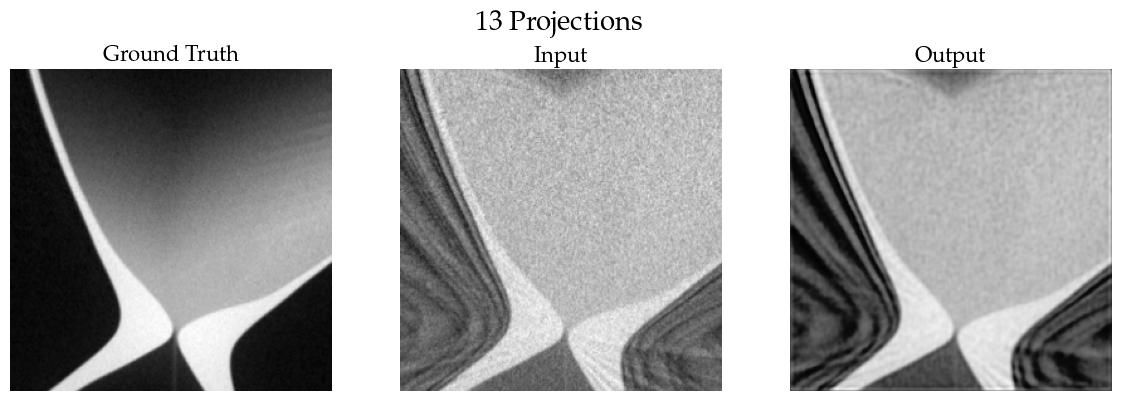

In [89]:
img1 = (crossections["13_enhanced"][:,128,:] - np.min(crossections["13_enhanced"][:,128,:]) )/ (np.max(crossections["13_enhanced"][:,128,:]) - np.min(crossections["13_enhanced"][:,128,:]))
imggt = (crossections["gt"][:,128,:] - np.min(crossections["gt"][:,128,:]) )/ (np.max(crossections["gt"][:,128,:]) - np.min(crossections["gt"][:,128,:]))
img2 = (crossections["13"][:,128,:] - np.min(crossections["13"][:,128,:]) )/ (np.max(crossections["13"][:,128,:]) - np.min(crossections["13"][:,128,:]))

# plt.imshow(img1, cmap="gray")
# plt.show()
# plt.imshow(imggt, cmap="gray")
# plt.show()
# plt.imshow(img2, cmap="gray")
# plt.show()

plot_slice_grid(
    [crossections["gt"][:,:,180], crossections["13"][:,:,180], crossections["13_enhanced"][:,:,180]],
    ["Ground Truth", "Input", "Output"],
    bar=False,
    folder ="Hourglass",
    suptitle="13 Projections",
    savefig=False,
    savefile="Hourglass_13_projections",)

(256, 256)


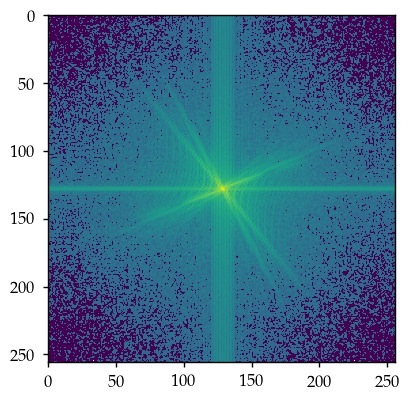

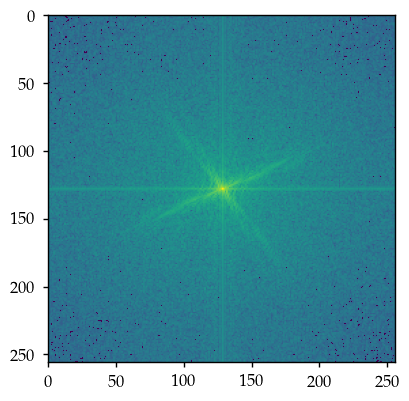

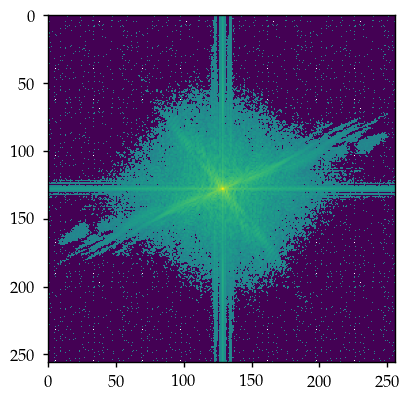

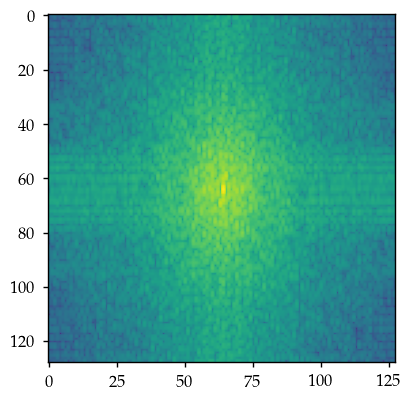

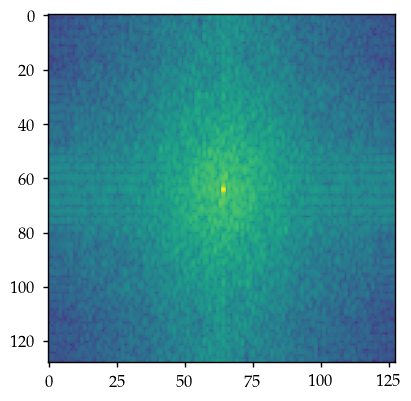

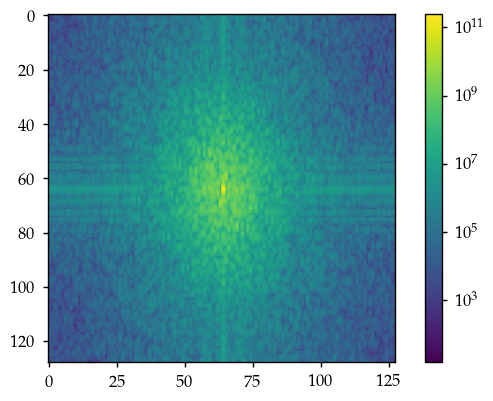

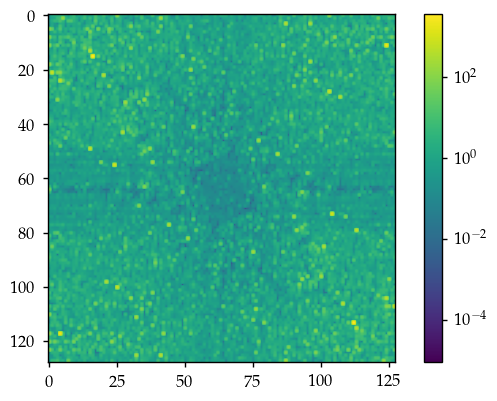

In [118]:
import scipy as sp
from matplotlib import colors

gt_k = sp.fft.fftshift(sp.fft.fftn(crossections["gt"][:,:,180]))
in_k = sp.fft.fftshift(sp.fft.fftn(crossections["13"][:,:,180]))
out_k = sp.fft.fftshift(sp.fft.fftn(crossections["13_enhanced"][:,:,180]))

print(gt_k.shape)

plt.imshow(np.abs(gt_k**2), norm = colors.LogNorm())
plt.show()
plt.imshow(np.abs(in_k**2), norm = colors.LogNorm())
plt.show()
plt.imshow(np.abs(out_k**2), norm = colors.LogNorm())
plt.show()

val_gt = sp.fft.fftshift(sp.fft.fftn(val_data["gt"]))
val_in = sp.fft.fftshift(sp.fft.fftn(val_data["in"]))
val_out = sp.fft.fftshift(sp.fft.fftn(val_data["out"]))

plt.imshow(np.abs(val_gt**2), norm = colors.LogNorm())
plt.show()
plt.imshow(np.abs(val_in**2), norm = colors.LogNorm())
plt.show()
plt.imshow(np.abs(val_out**2), norm = colors.LogNorm())
plt.colorbar()
plt.show()

plt.imshow(np.abs(val_gt-val_out)**2/np.abs(val_gt**2) +1e-12, norm = colors.LogNorm())
plt.colorbar()
plt.show()


In [64]:
def validation_table(attr1, attr2,name, projections=["17", "34", "51"], cols=5, int_lenght=1):

    tab = []
    #Initializing tabular env
    cs = ""
    for i in range(cols):
        cs += "c "
    tab.append("\\begin{tabular}{%s}"%cs)

    #creating header
    tab.append("\\hline")
    tab.append("\\multicolumn{%i}{c}{\\textbf{%s}} \\\\"%(cols, name))

    header_titles = "\\textbf{Projections} &\\multicolumn{%i}{c}{\\textbf{SSIM}} & \\multicolumn{%i}{c}{\\textbf{PSNR}}  \\\\"%((cols-1)//2, (cols-1)//2 )
    tab.append(header_titles)
    # header = ""
    # for i in range(len(exposures)):
    #     header += "& \\textbf{\\num{%s}%s} "%(exposures[i][:-1], exposures[i][-1])
    # header += "\\\\"
    # tab.append(header)
    tab.append("\\hline")

    # for j, id in enumerate(projections):
        
    for i, (k, v) in enumerate(attr1.items()):
        row = "\\textbf{%s} "%projections[i]
        if int_lenght == 1:
            row += "& \\num{%.3f}"%attr1[k]
        elif int_lenght >=3:
            row += "& \\num{%.0f}"%attr1[k]
        else:
            row += "& \\num{%.2f}"%attr1[k]

    for i, (k, v) in enumerate(attr2.items()):
        if int_lenght == 1:
            row += "& \\num{%.3f}"%attr2[k]
        elif int_lenght >=3:
            row += "& \\num{%.0f}"%attr2[k]
        else:
            row += "& \\num{%.2f}"%attr2[k]
    row += "\\\\"
    tab.append(row)

    #Finishing tabular env
    tab.append("\\hline")
    tab.append("\\end{tabular}")
    return tab

In [65]:
def evaluate(x,y):

    x = (x- np.min(x)) / (np.max(x)-np.min(x))
    y = (y- np.min(y)) / (np.max(y)-np.min(y))

    ssim = utils.calc_ssim(x, y)
    psnr = utils.calc_psnr(x, y)
    return ssim, psnr

ssims = {}
psnrs = {}

x1, x2 = 0, 256
y1, y2 = 0, 256
z1, z2 = 0, 256

for k, v in crossections.items():
    if k == "gt":
        continue

    ss, ps = evaluate(crossections["gt"][x1:x2, y1:y2, z1:z2], v[x1:x2, y1:y2, z1:z2])
    ssims[k] = ss #utils.calc_ssim(crossections["gt"][x1:x2, y1:y2, z1:z2], v[x1:x2, y1:y2, z1:z2])
    psnrs[k] = ps #utils.calc_psnr(crossections["gt"][x1:x2, y1:y2, z1:z2], v[x1:x2, y1:y2, z1:z2])

print(ssims)
print(psnrs)

{'13': 0.6031599019580697, '39': 0.7330793692301547, '65': 0.7664119556757191, '104': 0.8179948948148982, '13_enhanced': 0.7318059044925344, '39_enhanced': 0.8039571241359434, '65_enhanced': 0.8219578958603995, '104_enhanced': 0.8516828404119354}
{'13': 10.172998679275407, '39': 12.239623602657442, '65': 12.975349561561554, '104': 14.56366963407026, '13_enhanced': 12.624256921316778, '39_enhanced': 14.12449143920801, '65_enhanced': 14.657495120199442, '104_enhanced': 15.609072612454998}


In [69]:
validation_table(ssims, psnrs, "Model Test", projections=["13","39","65","104","13e","39e","65e","104e"] ,cols=5, int_lenght=2)

['\\begin{tabular}{c c c c c }',
 '\\hline',
 '\\multicolumn{5}{c}{\\textbf{Model Test}} \\\\',
 '\\textbf{Projections} &\\multicolumn{2}{c}{\\textbf{SSIM}} & \\multicolumn{2}{c}{\\textbf{PSNR}}  \\\\',
 '\\hline',
 '\\textbf{104e} & \\num{0.85}& \\num{10.17}& \\num{12.24}& \\num{12.98}& \\num{14.56}& \\num{12.62}& \\num{14.12}& \\num{14.66}& \\num{15.61}\\\\',
 '\\hline',
 '\\end{tabular}']

In [77]:
def plot_attr_development(x, attrs, labels, xlabel="Projections", ylabel="SSIM" ):

    fig, ax = plt.subplots(1,1, )

    for attr, label in zip(attrs, labels):
        ax.plot(x, attr, "D:", label=label)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.show()


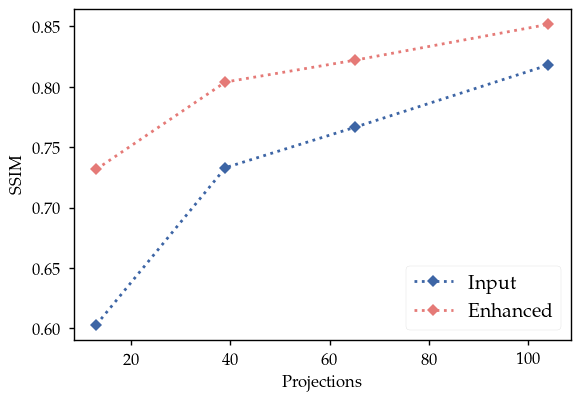

In [78]:
unenhanced = ssims["13"], ssims["39"], ssims["65"], ssims["104"]
enhanced = ssims["13_enhanced"], ssims["39_enhanced"], ssims["65_enhanced"], ssims["104_enhanced"]

plot_attr_development([13,39,65,104], [unenhanced, enhanced], ["Input", "Enhanced"], xlabel="Projections", ylabel="SSIM" )